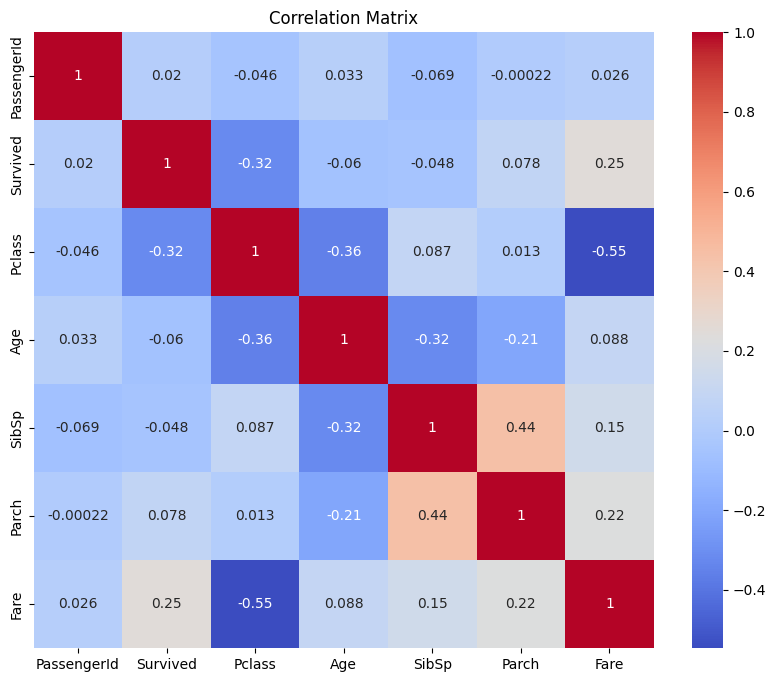

Highly correlated columns: {('Fare', 'Pclass')}
Accuracy: 0.7430167597765364


In [1]:
from pandas import read_csv

RANDOM_STATE = 42

# Read the training data from titanic csv file
train_data = read_csv('datasets/titanic/train.csv')
train_data.describe()

# Split the data into test and train
from sklearn.model_selection import train_test_split # noqa E402
train, test = train_test_split(train_data, test_size=0.2, random_state=RANDOM_STATE)

# Get numerical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix with only numerical columns
import seaborn as sns # noqa E402
import matplotlib.pyplot as plt # noqa E402
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Select the columns that are highly correlated
correlation_threshold = 0.5
highly_correlated_columns = set()
correlation_matrix = numerical_columns.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            column = correlation_matrix.columns[i]
            column2 = correlation_matrix.columns[j]
            highly_correlated_columns.add((column, column2))

print('Highly correlated columns:', highly_correlated_columns)

# Drop the highly correlated columns
train = train.drop(columns=[column for column, _ in highly_correlated_columns])
# Drop non numerical columns
train = train.select_dtypes(include=['int64', 'float64'])

# Fill missing values
train = train.fillna(train.mean())

# Split the data into X and y
X = train.drop(columns=['Survived'])
y = train['Survived']

# Train the model using Logistic Regression
from sklearn.linear_model import LogisticRegression # noqa E402
model = LogisticRegression(random_state=RANDOM_STATE)
model.fit(X, y)

# Evaluate the model
from sklearn.metrics import accuracy_score # noqa E402
test = test.drop(columns=[column for column, _ in highly_correlated_columns])
test = test.select_dtypes(include=['int64', 'float64'])
test = test.fillna(test.mean())
X_test = test.drop(columns=['Survived'])
y_test = test['Survived']
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# With a baseline to work with lets try to improve the actual prediction

Will start with trying to understand the data's shape, cleaning it a little bit
and trying to decide what is the best model to try to tackle it.

In [2]:
%matplotlib inline
all_data = read_csv('datasets/titanic/train.csv')


# I will split first the data into training and testing
from sklearn.model_selection import train_test_split # noqa E402
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=RANDOM_STATE) # 20% of the data will be used for testing


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')